## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Ta-Wei Huang
### UNI: th3061

### Setup

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import	precision_score, recall_score, 	accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# Feel free to import any other packages you need

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [11]:

print("Number of observations: ", raw_df.shape[0])
print("Number of postive values: ", raw_df[raw_df["Class"]==1].shape[0])
print("Number of negative values: ", raw_df[raw_df["Class"]==0].shape[0])


Number of observations:  284807
Number of postive values:  492
Number of negative values:  284315


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [10]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [26]:
df_X = cleaned_df.drop(columns=['Class'])
df_Y = cleaned_df['Class'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [34]:
'''scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_test_scaled = scaler.transform(X_test)'''

features_name = list(df_X.select_dtypes(include=[np.number]).columns)
preprocess = make_column_transformer((StandardScaler(), features_name))


### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [36]:
# Your Code Here
clf = DecisionTreeClassifier(max_depth = 10, random_state=42)
pipe = make_pipeline(preprocess, clf)
auc_scores = cross_val_score(pipe, X_dev, y_dev, cv=5, scoring='roc_auc')
ap_scores = cross_val_score(pipe, X_dev, y_dev, cv=5, scoring='average_precision')
print("Mean AUC:", auc_scores.mean())
print("Mean Average Precision:", ap_scores.mean())

Mean AUC: 0.8654303324923142
Mean Average Precision: 0.6611132453729376


### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [55]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)
print("Number of postive values: ", y_dev_oversample[y_dev_oversample == 1].shape[0])
print("Number of negative values: ", y_dev_oversample[y_dev_oversample == 0].shape[0])
print("Shape of development dataset: ", X_dev_oversample.shape)

Number of postive values:  227451
Number of negative values:  227451
Shape of development dataset:  (454902, 29)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [56]:
pipe_oversampling = imb_make_pipeline(ros, clf)
scores = cross_validate(pipe_oversampling, X_dev, y_dev, cv=5, 
                        scoring = ['roc_auc', 'average_precision'])
print("Mean AUC:", scores['test_roc_auc'].mean())
print("Mean Average Precision:", scores['test_average_precision'].mean())

Mean AUC: 0.9040580842866961
Mean Average Precision: 0.6189084322464875


### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [57]:
rus = RandomUnderSampler(random_state=42)
X_dev_undersample, y_dev_undersample = rus.fit_resample(X_dev, y_dev)
print("Number of postive values: ", y_dev_undersample[y_dev_undersample == 1].shape[0])
print("Number of negative values: ", y_dev_undersample[y_dev_undersample == 0].shape[0])
print("Shape of development dataset: ", X_dev_undersample.shape)

Number of postive values:  394
Number of negative values:  394
Shape of development dataset:  (788, 29)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [58]:
pipe_undersampling = imb_make_pipeline(rus, clf)
scores = cross_validate(pipe_undersampling, X_dev, y_dev, cv=5, 
                        scoring = ['roc_auc', 'average_precision'])
print("Mean AUC:", scores['test_roc_auc'].mean())
print("Mean Average Precision:", scores['test_average_precision'].mean())

Mean AUC: 0.9059974282820538
Mean Average Precision: 0.015208240750831947


### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [60]:
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)
print("Number of postive values: ", y_dev_smote[y_dev_smote == 1].shape[0])
print("Number of negative values: ", y_dev_smote[y_dev_smote == 0].shape[0])
print("Shape of development dataset: ", X_dev_smote.shape)

Number of postive values:  227451
Number of negative values:  227451
Shape of development dataset:  (454902, 29)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [61]:
# Your Code Here
pipe_smote = imb_make_pipeline(smote, clf)
scores = cross_validate(pipe_smote, X_dev, y_dev, cv=5, 
                        scoring = ['roc_auc', 'average_precision'])
print("Mean AUC:", scores['test_roc_auc'].mean())
print("Mean Average Precision:", scores['test_average_precision'].mean())

Mean AUC: 0.8770801968872887
Mean Average Precision: 0.4917493293227917


### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [62]:
clf_balanced = DecisionTreeClassifier(max_depth = 10, random_state=42, class_weight='balanced')
pipe_balanced_weight = make_pipeline(preprocess, clf_balanced)
scores = cross_validate(pipe_balanced_weight, X_dev, y_dev, cv=5, 
                        scoring = ['roc_auc', 'average_precision'])
print("Mean AUC:", scores['test_roc_auc'].mean())
print("Mean Average Precision:", scores['test_average_precision'].mean())

Mean AUC: 0.9070005244195443
Mean Average Precision: 0.623661060432623


### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [65]:
# fit the model
pipe.fit(X_dev, y_dev)
pipe_undersampling.fit(X_dev, y_dev)
pipe_oversampling.fit(X_dev, y_dev)
pipe_smote.fit(X_dev, y_dev)
pipe_balanced_weight.fit(X_dev, y_dev)
# prediction on testing data
prediction_scores_default = pipe.predict_proba(X_test)
prediction_scores_under = pipe_undersampling.predict_proba(X_test)
prediction_scores_over = pipe_oversampling.predict_proba(X_test)
prediction_scores_smote = pipe_smote.predict_proba(X_test)
prediction_scores_balanced_weight = pipe_balanced_weight.predict_proba(X_test)
# calculate auc score
auc_value_default = roc_auc_score(y_test, prediction_scores_default[:, 1])
auc_value_under = roc_auc_score(y_test, prediction_scores_under[:, 1])
auc_value_over = roc_auc_score(y_test, prediction_scores_over[:, 1])
auc_value_smote = roc_auc_score(y_test, prediction_scores_smote[:, 1])
auc_value_balanced_weight = roc_auc_score(y_test, prediction_scores_balanced_weight[:, 1])

print("AUC Value of Default Baseline:", auc_value_default)
print("AUC Value of Random Undersampling:", auc_value_under)
print("AUC Value of Random Oversampling:", auc_value_over)
print("AUC Value of SMOTE:", auc_value_smote)
print("AUC Value Balanced Weight:", auc_value_balanced_weight)

AUC Value of Default Baseline: 0.9114035421427996
AUC Value of Random Undersampling: 0.9097537052243521
AUC Value of Random Oversampling: 0.9097537052243521
AUC Value of SMOTE: 0.9097537052243521
AUC Value Balanced Weight: 0.8432507780827582


/Users/dawei_banana/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

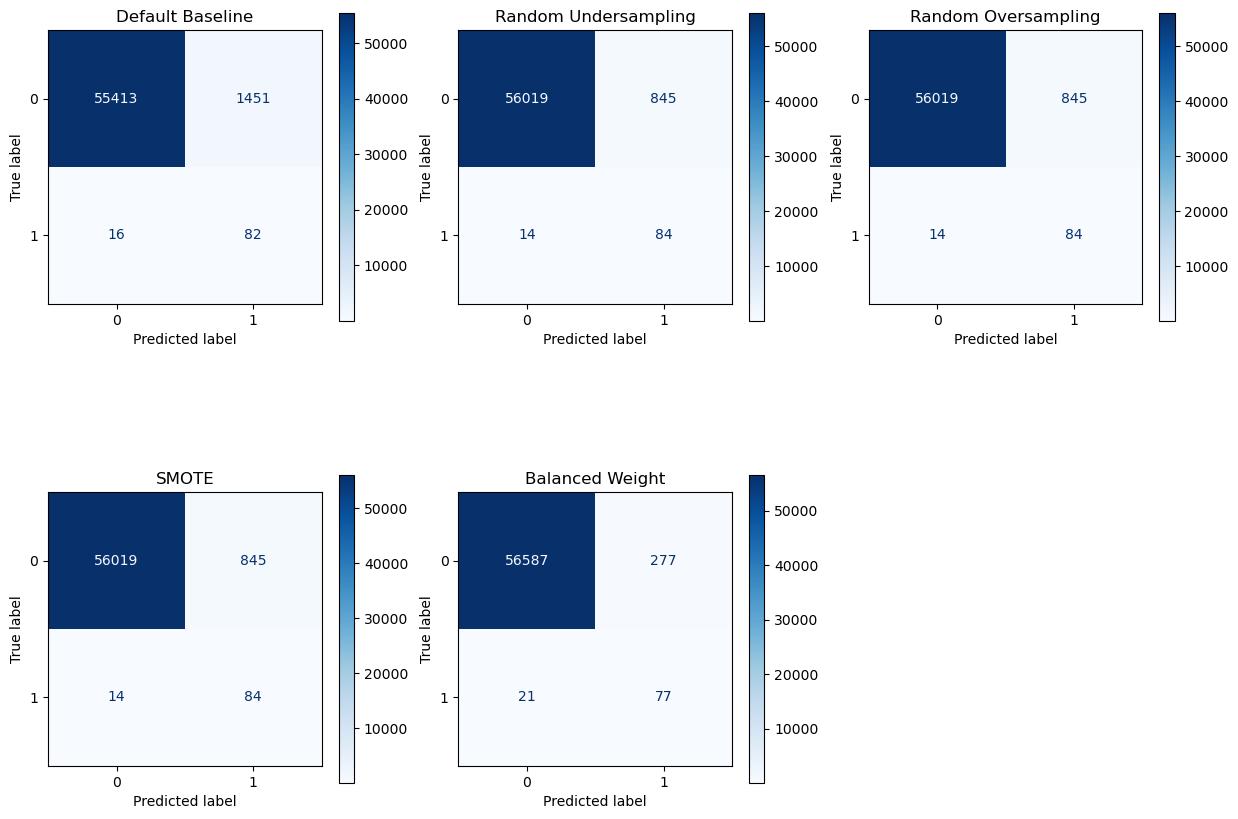

In [74]:
model_names = [
    ('Default Baseline', prediction_scores_default),
    ('Random Undersampling', prediction_scores_under),
    ('Random Oversampling', prediction_scores_over),
    ('SMOTE', prediction_scores_smote),
    ('Balanced Weight', prediction_scores_balanced_weight)
]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5) 

for (model_name, prediction_scores), ax in zip(model_names, axes.ravel()):
    cm = confusion_matrix(y_test, prediction_scores.argmax(axis=1))
    display_labels = clf.classes_

    # Create and display the confusion matrix plot
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

    display.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')  # Adjust the colormap and format as needed

    ax.set_title(f'{model_name}')


for i in range(len(model_names), 2 * 3):
    fig.delaxes(axes.ravel()[i])


plt.show()



Random Undersampling, Random Oversampling, and SMOTE have the same confusion matrices. 

For Default Baseline, the False Positive is the highest compared to the rest of the models. For Balanced Weight, it has the lowest False Positive in these five models. 

If the company puts more emphasis on precision of the model, the Balanced Weight model will be the first choice. On the other hand, if the company cares about the recall, which means it want to lower the False Negative, the model using Random Undersampling, Random Oversampling, and SMOTE would be a better choice.

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

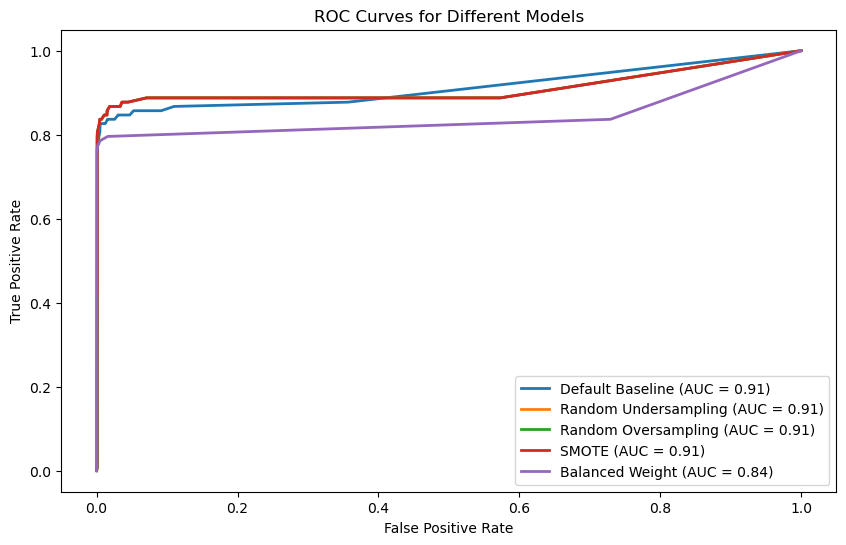

In [77]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))

for model_name, prediction_scores in model_names:
    # Calculate the ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(y_test, prediction_scores[:, 1])  
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

By comparing AUC, the model with Balanced Weight has the lowest value. 

Random Undersampling, Random Oversampling, and SMOTE have the same ROC curves. 

In the comparison of red curve(Random Undersampling, Random Oversampling, and SMOTE) and blue curve(Default Baseline), they have the same True Postive value at about 0.4 False Positive Rate(FPR). When FPR < 0.4, the red curve exhibits a higher recall compared to the blue roc curve, which means that in this region of FPR, the Random Undersampling, Random Oversampling, and SMOTE performs better in terms of identifying True Positives, making it a better choice for scenarios where minimizing False Positve is crucial. 